# TITANIC

# Load Data

In [2]:
import pandas as pd

from loadDataUtils import loadDataUtils

In [3]:
path_train = r'C:\Users\39320\Desktop\myProjects_python\Titanic\data\train.csv'
path_test = r'C:\Users\39320\Desktop\myProjects_python\Titanic\data\test.csv'
data = loadDataUtils(path_train, path_test)

In [ ]:
df_train, df_test = data.get_train_and_test()
all_data = pd.concat(df_train, df_test)

# Eploration

Let's see the first 5 columns of the dataset to get an idea of the data we are going to work with

In [9]:
df_train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we can observe that there are both numeric, categorical variables and text.
In particular, as numerical variables we have:
1. Age
2. Fare

The categorical columns are:
1. PassengerID
2. Survived (which will also be the variable to predict)
3. Pclass
4. Sex (we need to do a transformation, but this field has only two values)
5. SibSp
6. Parch
7. Embarked (has three values plus null values, to which we will give a default value when cleaning the data)

Text variables:
1. Name (where we can find important values such as the category of the person Miss. , Mr., Doctor ...)
2. Ticket
3. Cabin (perhaps he can give us some important information on where the passenger cabins were and in this way perhaps understand who would be saved, because perhaps closer to the lifeboats.)

In [7]:
#quick look at our data types & null counts
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


From here, in addition to seeing the type of variables we will be dealing with, we can also observe the presence of null values.
In fact, we can see that the columns that present null values are:
1. Age
2. Cabin
3. Embarked

For Embarked we will use a dummy variable to replace null values. We will probably remove the Cabin column as it has too many null values and is also unlikely to give us too much useful information. Finally, for the age we will give the average age value based on the title extracted from the name column and if there is no title, the average value of the entire dataset will be assigned.

In [8]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [10]:
# all columns
df_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [11]:
# quick way to separate numeric columns
df_train.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

## Some Graph

### Numerical variables

In [13]:
import matplotlib.pyplot as pl

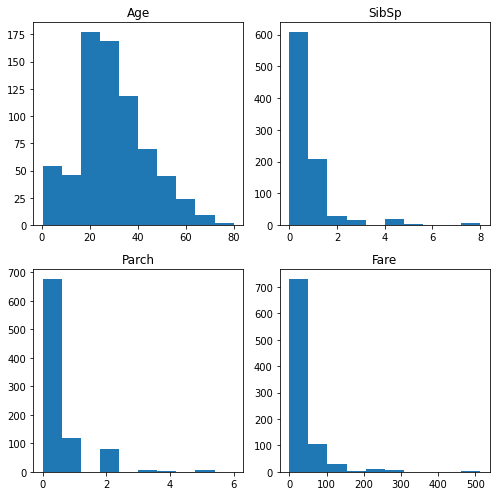

In [39]:
# exploration plot numerical
fig, ax = pl.subplots(2, 2, figsize=(7, 7))

#subplot(0,0)
ax[0, 0].hist(df_train['Age'])
ax[0, 0].set_title('Age')

#subplot(0,1)
ax[0, 1].hist(df_train['SibSp'])
ax[0, 1].set_title('SibSp')

#subplot(1,0)
ax[1, 0].hist(df_train['Parch'])
ax[1, 0].set_title('Parch')

#subplot(1,1)
ax[1, 1].hist(df_train['Fare'])
ax[1, 1].set_title('Fare')

pl.savefig("./plots/exploration_numerical.png")
fig.tight_layout()
pl.show()

#### correlation map

In [42]:
import seaborn as sns

            Age     SibSp     Parch      Fare
Age    1.000000 -0.308247 -0.189119  0.096067
SibSp -0.308247  1.000000  0.414838  0.159651
Parch -0.189119  0.414838  1.000000  0.216225
Fare   0.096067  0.159651  0.216225  1.000000


<AxesSubplot:>

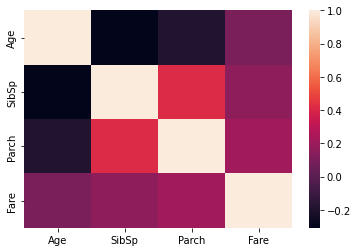

In [46]:
print(df_train[['Age', 'SibSp', 'Parch', 'Fare']].corr())
sns.heatmap(df_train[['Age', 'SibSp', 'Parch', 'Fare']].corr())

In [47]:
# compare survival rate across Age, SibSp, Parch, and Fare
pd.pivot_table(df_train, index = 'Survived', values = ['Age','SibSp','Parch','Fare'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


### Categorical variables

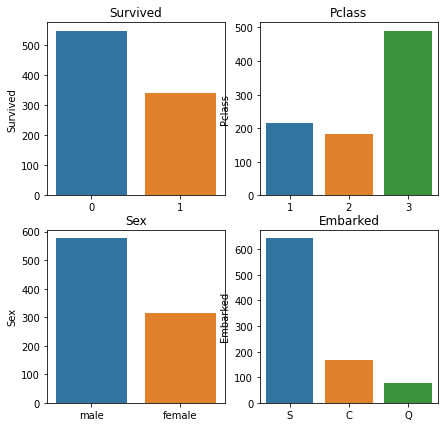

In [65]:
# exploration plot categorial
fig2, ax2 = pl.subplots(2, 2, figsize=(7, 7))

#subplot(0,0)
sns.barplot(ax=ax2[0,0],
            x= df_train['Survived'].value_counts().index,
            y=df_train['Survived'].value_counts()).set_title('Survived')

#subplot(0,1)
sns.barplot(ax=ax2[0,1],
            x=df_train['Pclass'].value_counts().index,
            y=df_train['Pclass'].value_counts()).set_title('Pclass')

#subplot(1,0)
sns.barplot(ax=ax2[1,0],
            x=df_train['Sex'].value_counts().index,
            y=df_train['Sex'].value_counts()).set_title('Sex')

#subplot(1,1)
sns.barplot(ax=ax2[1,1],
            x=df_train['Embarked'].value_counts().index,
            y=df_train['Embarked'].value_counts()).set_title('Embarked')

pl.savefig("./plots/exploration_categorical.png")
fig.tight_layout()
pl.show()

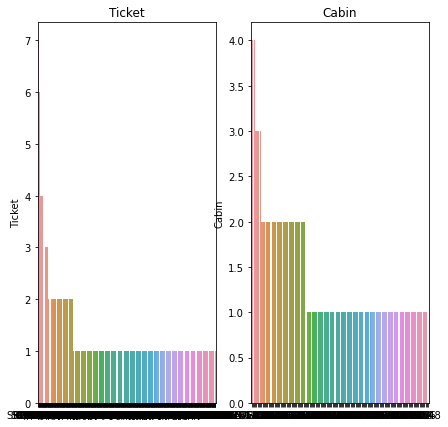

In [69]:
#other variables
fig3, ax3 = pl.subplots(1, 2, figsize=(7, 7))

#subplot(0)
sns.barplot(ax=ax3[0],
            x= df_train['Ticket'].value_counts().index,
            y=df_train['Ticket'].value_counts()).set_title('Ticket')

#subplot(1)
sns.barplot(ax=ax3[1],
            x=df_train['Cabin'].value_counts().index,
            y=df_train['Cabin'].value_counts()).set_title('Cabin')

pl.savefig("./plots/exploration_other.png")
fig.tight_layout()
pl.show()

#### correlation map

In [66]:
# Comparing survival and each of these categorical variables
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Sex', values = 'Ticket' ,aggfunc ='count'))
print()
print(pd.pivot_table(df_train, index = 'Survived', columns = 'Embarked', values = 'Ticket' ,aggfunc ='count'))

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119

Sex       female  male
Survived              
0             81   468
1            233   109

Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217
